## Download dos dados

In [ ]:
# Importando todas as bíbliotecas necessárias para o donwload
from tqdm import *
import pandas as pd
import requests
import tweepy
import json
import os

In [ ]:
# Baixando o arquivo TSV fornecido
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [ ]:
# Autenticando na API do Twitter
consumer_key        = ' '
consumer_secret     = ' '

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=False, timeout=30, retry_count=3, retry_delay=1)

In [6]:
# Data Scraping para recolher número de retweeets e favorites
twitter = pd.read_csv('twitter_archive_enhanced.csv')
errors = pd.Series([])
open('tweet_json.txt', 'w').close()
with tqdm(total=len(twitter.tweet_id), unit='Tweet') as pbar:
    for id in twitter.tweet_id:
        try:
            # Cria o arquivo das informações coletadas com êxito
            tweet = api.get_status(id, tweet_mode='extended')
            with open('tweet_json.txt', 'a+') as file:
                json.dump(tweet._json, file)
                file.write('\n')
        except:
            # Cria uma Serie com os tweets que não foram possíveis coletar
            errors = errors.append(pd.Series([id]),ignore_index=True)
        # Barra de progressão para acompanhar a evolução da raspagem:
        pbar.update(1)
# Salvando os tweets que não foram possíveis coletar
errors.to_csv('errors.csv')

100%|███████████████████████████████████████████████████████████████████████████| 2356/2356 [35:07<00:00,  2.36Tweet/s]


## Carregamento dos dados

In [1]:
# Importando todas as bíbliotecas necessárias para essa etapa
import pandas as pd
import numpy as np
import json
import os

In [2]:
# Lendo os arquivos de dados
twitter = pd.read_csv('twitter_archive_enhanced.csv')
predictions = pd.read_csv('image_predictions.tsv',sep='\t')
tweets = retweets = favorites = retweeted = pd.Series([])
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    for i in range(len(lines)):
        tweets    = tweets.append(pd.Series([json.loads(lines[i])['id']]),ignore_index=True)
        retweets  = retweets.append(pd.Series([json.loads(lines[i])['retweet_count']]),ignore_index=True)
        favorites = favorites.append(pd.Series([json.loads(lines[i])['favorite_count']]),ignore_index=True)
        if favorites[len(favorites)-1] == 0:
            favorites[len(favorites)-1] = json.loads(lines[i])['retweeted_status']['favorite_count']
scraps = pd.DataFrame({'tweet_id':tweets.values, 'retweet_count':retweets.values, 'favorite_count':favorites.values})
errors = pd.read_csv('errors.csv',index_col=0,header=None,squeeze=True)

# Avaliação dos dados

In [45]:
# Para conseguir enxergar toda a descrição dos twitters, use:
# pd.set_option('display.max_colwidth', -1)

In [46]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [47]:
twitter.iloc[np.r_[0:3, -3:0]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [48]:
twitter.dropna(subset=['retweeted_status_id'])[['tweet_id','text','retweeted_status_id']].iloc[np.r_[0:3, -3:0]]

,tweet_id,text,retweeted_status_id
19,888202515573088257,RT @dog_rates: This is Canela. She attempted s...,8.874740e+17
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17
36,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17
1242,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17
2259,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17
2260,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17


In [49]:
twitter.dropna(subset=['in_reply_to_status_id'])[['tweet_id','text','in_reply_to_status_id']].iloc[np.r_[0:3, -3:0]]

,tweet_id,text,in_reply_to_status_id
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,8.862664e+17
55,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,8.816070e+17
64,879674319642796034,@RealKentMurphy 14/10 confirmed,8.795538e+17
2169,669353438988365824,This is Tessa. She is also very pleased after ...,6.678065e+17
2189,668967877119254528,12/10 good shit Bubka\n@wane15,6.689207e+17
2298,667070482143944705,After much debate this dog is being upgraded t...,6.670655e+17


In [50]:
# Checar se tem algum duplicado
twitter.duplicated().sum()

0

In [51]:
# Análise visual das 6 tabelas abaixo
twitter[['text','name','doggo','floofer','pupper','puppo']].iloc[np.r_[0:5, -5:0]]

,text,name,doggo,floofer,pupper,puppo
0,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None
1,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None
2,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None
3,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None
4,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None
2351,Here we have a 1949 1st generation vulpix. Enj...,None,None,None,None,None
2352,This is a purebred Piers Morgan. Loves to Netf...,a,None,None,None,None
2353,Here is a very happy pup. Big fan of well-main...,a,None,None,None,None
2354,This is a western brown Mitsubishi terrier. Up...,a,None,None,None,None
2355,Here we have a Japanese Irish Setter. Lost eye...,None,None,None,None,None


In [52]:
# Verificar o quão populada estão as 4 tabelas abaixo
twitter[['doggo','floofer','pupper','puppo']].replace('None',np.nan).dropna(how='all').count()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [53]:
# Verificando quantos nomes próprios da tabela "name" não são de fato nomes próprios
twitter.name.str.extract(r'([A-Z]\D+)',expand=True).replace('None',np.nan)[0].value_counts(dropna=False).head()

NaN        855
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Name: 0, dtype: int64

In [54]:
# Verificar se há tweets sem imagem
twitter.expanded_urls.str.extract(r'(photo)',expand=True)[0].value_counts(dropna=False)

photo    2077
NaN       279
Name: 0, dtype: int64

In [55]:
# Verifica quantos denominadores são diferentes de 10
twitter[['tweet_id','text','rating_numerator','rating_denominator']][twitter.rating_denominator != 10]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",9,11
902,758467244762497024,Why does this never happen at my front door......,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50


In [56]:
# Verificando outliers
twitter[['tweet_id','text','rating_numerator','rating_denominator']][twitter.rating_denominator == 10].sort_values(by='rating_numerator').iloc[np.r_[0:5, -15:0]]

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plag...,0,10
1016,746906459439529985,"PUPDATE: can't see any. Even if I could, I cou...",0,10
2338,666104133288665088,Not familiar with this breed. No tail (weird)....,1,10
2038,671550332464455680,After 22 minutes of careful deliberation this ...,1,10
2261,667549055577362432,Never seen dog like this. Breathes heavy. Tilt...,1,10
83,876537666061221889,I can say with the pupmost confidence that the...,14,10
866,762035686371364864,This left me speechless. 14/10 heckin heroic a...,14,10
339,832273440279240704,Say hello to Smiley. He's a blind therapy dogg...,14,10
285,838916489579200512,RT @KibaDva: I collected all the good dogs!! 1...,15,10
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking fo...,15,10


In [57]:
# Visualizando os primeiros e últimos cinco registros do dataset de predição
predictions.iloc[np.r_[0:5, -5:0]]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [58]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [59]:
print('Com taxa de confiança na predição de no mínimo:')
for i in range(1,11):
    taxa = i/10
    print('   ' + str(int(taxa*100)) + '% temos ' + str(predictions.tweet_id[(predictions.p1_conf > taxa) | (predictions.p2_conf > taxa) |(predictions.p3_conf > taxa)].count()) + ' dados')

Com taxa de confiança na predição de no mínimo:
   10% temos 2052 dados
   20% temos 1911 dados
   30% temos 1706 dados
   40% temos 1455 dados
   50% temos 1239 dados
   60% temos 1017 dados
   70% temos 833 dados
   80% temos 624 dados
   90% temos 396 dados
   100% temos 0 dados


In [60]:
scraps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
tweet_id          2341 non-null int64
retweet_count     2341 non-null int64
favorite_count    2341 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [61]:
scraps.describe()

,tweet_id,retweet_count,favorite_count
count,2.341000e+03,2341.000000,2341.000000
mean,7.422089e+17,2968.709526,9353.773174
std,6.833609e+16,4979.648861,13001.345788
min,6.660209e+17,0.000000,51.000000
25%,6.783411e+17,597.000000,1978.000000
50%,7.186133e+17,1386.000000,4321.000000
75%,7.986979e+17,3465.000000,12090.000000
max,8.924206e+17,84501.000000,164946.000000


In [62]:
scraps.iloc[np.r_[0:3, -3:0]]

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8431,38377
1,892177421306343426,6211,32884
2,891815181378084864,4111,24778
2338,666033412701032449,44,125
2339,666029285002620928,47,128
2340,666020888022790149,508,2554


## Relatório:

##### Qualidade:
- `twitter_archive_enhanced.csv`:
    - Há retweets e respostas no meio dos tweets. Esses precisam ser descartados;
    - As notas de avaliação as vezes não se referem de fato as notas do tweet;
    - A coluna **source** tem parte html. Precisa ser limpa;
    - Há tweets que não contêm imagem. Esses precisam ser descartados;
    - Tem muitos "None" no lugar de NaN;
    - Muitos nomes da coluna **name** estão incorretos;
    - Alguns denominadores são diferentes de 10 e podem impactar nas estatisticas;
    - Algumas notas são pontuações muito discrepantes e precisam ser ajustadas.
- `image_predictions.tsv`:
    - As predições contêm underline ao invés de espaços em braco;
    - Algumas predições começam com letra minúscula e outras em maiúsculas;

##### Arrumação:
- `twitter_archive_enhanced.csv`:
    - Alterar os tipos de dados de diversas colunas;
    - Juntar as colunas **doggo**, **floofer**, **pupper** e **puppo** para uma só;
    - Descartar colunas de respostas (**reply**) e **retweeteds**;
    - Descartar a coluna do denominador, a partir do momento que todos forem 10;
- `image_predictions.tsv`:
    - Juntar as 3 predições, mantendo a predição de cachorro mais confiável;
    - Descartar as colunas **p1***, **p2***, **p3***, **img_num**;
- Juntar os três arquivos em um só através do **tweet_id**;

# Limpeza

In [63]:
# Cópia de segurança
twitter_clean     = twitter.copy()
predictions_clean = predictions.copy()
scraps_clean      = scraps.copy()

### `twitter_archive_enhanced.csv`

In [64]:
# Removendo todos os retweets, respostas e respectivas colunas
twitter_clean = twitter_clean[(twitter_clean.retweeted_status_id.isnull())]
twitter_clean = twitter_clean[(twitter_clean.retweeted_status_user_id.isnull())]
twitter_clean = twitter_clean[(twitter_clean.retweeted_status_timestamp.isnull())]
twitter_clean = twitter_clean[(twitter_clean.in_reply_to_user_id.isnull())]
twitter_clean = twitter_clean[(twitter_clean.in_reply_to_status_id.isnull())]
twitter_clean.drop(axis=1,columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_user_id','in_reply_to_status_id'], inplace=True)

In [65]:
# Removendo parte HTML da coluna source
for index, row in twitter_clean.iterrows():
    twitter_clean.loc[twitter_clean['tweet_id'] == row.tweet_id, 'source'] = row.source.split('>')[1].split('<')[0]

In [66]:
# Removendo tweets que não contêm imagem.
twitter_clean = twitter_clean[twitter_clean.expanded_urls.notnull()]

In [67]:
# Substituindo os None por NaN
twitter_clean.replace(to_replace='None', value=np.NaN, inplace=True)

In [68]:
# Retirando tudo que não for nome próprio
twitter_clean.name = twitter_clean.name.str.extract(r'([A-Z]\D+)',expand=True)

In [69]:
# Removendo um tweet sem avaliação
twitter_clean.drop(index=516,inplace=True)

In [70]:
# Normalizando para que todas as avialações fiquem com denominador 10
for index, row in twitter_clean.iterrows():
    twitter_clean.loc[twitter_clean['tweet_id'] == row.tweet_id, 'rating_numerator'] = row.rating_numerator/(row.rating_denominator/10)
    twitter_clean.loc[twitter_clean['tweet_id'] == row.tweet_id, 'rating_denominator'] = row.rating_denominator/(row.rating_denominator/10)

In [71]:
# Arrumando notas erradas
media = twitter_clean.rating_numerator[(twitter_clean.rating_numerator > 0) & (twitter_clean.rating_numerator < 100)].mean()
dic = {1068:[14,10],
       1202:[13,10],
       1662:[10,10],
       695 :[10,10],
       763 :[11,10],
       1712:[11,10],
       2335:[9,10],
       55  :[13,10],
       979 :[media,10],
       188 :[media,10],
       189 :[media,10],
       2074:[media,10]}
for index, row in twitter_clean.iterrows():
    if index in dic.keys():
        twitter_clean.loc[twitter_clean['tweet_id'] == row.tweet_id, ['rating_numerator', 'rating_denominator']] = dic[index][0], dic[index][1]

In [72]:
# Removendo a coluna do denominador e renomeando a da nota
twitter_clean.rename(columns={'rating_numerator':'rating'},inplace=True)
twitter_clean.drop('rating_denominator', axis=1, inplace=True)

In [73]:
# Juntanado as colunas 'doggo','floofer','pupper','puppo' em uma só
melted = pd.melt(twitter_clean, id_vars=['tweet_id'], value_vars=['doggo','floofer','pupper','puppo'], value_name='dog_type').dropna().drop(['variable'],axis=1).reset_index()
twitter_clean = pd.merge(twitter_clean.drop(['doggo','floofer','pupper','puppo'],axis=1), melted, on=['tweet_id'],how='outer').drop(['index'],axis=1)

In [74]:
# Alterando os tipos de dados
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)
twitter_clean.rating = twitter_clean.rating.astype('int64')
twitter_clean.dog_type = twitter_clean.dog_type.astype('category')

### `image_predictions.tsv`

In [75]:
for i in range(1,4):
    # Trocar underline por espaço em branco e colocar todas as palavras começando com letra maiúscula
    predictions_clean['p%d' %i] = predictions_clean['p%d' %i].str.replace('_', ' ')
    predictions_clean['p%d' %i] = predictions_clean['p%d' %i].str.title()
    
    # Deletar valores das predições que não são de cachorros
    for index, row in predictions_clean.iterrows():
        if row['p%d_dog' %i] == False:
            predictions_clean.loc[predictions_clean['tweet_id'] == row.tweet_id, ['p%d'%i,'p%d_dog'%i,'p%d_conf'%i]] = np.NaN
            
    # Deletar a coluna de verificação 
    predictions_clean.drop(['p%d_dog' %i],axis=1,inplace=True)    

In [76]:
# Manter apenas a predição mais alta
for index, row in predictions_clean.replace(np.NaN,0).iterrows():
    if (row['p1_conf'] > row['p2_conf']) and (row['p1_conf'] > row['p3_conf']):
        predictions_clean.loc[predictions_clean['tweet_id'] == row.tweet_id, ['p2','p2_conf','p3','p3_conf']] = np.NaN
    elif (row['p2_conf'] > row['p1_conf']) and (row['p2_conf'] > row['p3_conf']):
        predictions_clean.loc[predictions_clean['tweet_id'] == row.tweet_id, ['p1','p1_conf','p3','p3_conf']] = np.NaN
    else:
        predictions_clean.loc[predictions_clean['tweet_id'] == row.tweet_id, ['p1','p1_conf','p2','p2_conf']] = np.NaN

In [77]:
# Resumir as colunas de predição
predictions_clean['dog_breed'] = predictions_clean[['p1','p2','p3']].apply(lambda x: ''.join(x.dropna()), axis=1)
predictions_clean['prediction_conf'] = predictions_clean[['p1_conf','p2_conf','p3_conf']].apply(lambda x: ''.join(x.dropna().astype('str')), axis=1)
predictions_clean.replace('', np.NaN, inplace=True)
predictions_clean.drop(['p1','p1_conf','p2','p2_conf','p3','p3_conf'], axis=1, inplace=True)
predictions_clean.prediction_conf = predictions_clean.prediction_conf.astype('float64')

In [78]:
# Dropar a coluna de números de imagem
predictions_clean.drop(['img_num'], axis=1, inplace=True)

In [79]:
# Juntar tudo em um DataFrame só
merged = pd.merge(twitter_clean, predictions_clean, on='tweet_id')
merged = pd.merge(merged, scraps_clean, on='tweet_id')

In [80]:
# Consolidando tudo na tabela final e alterando ordem das colunas
we_rate_dogs = merged[['tweet_id','retweet_count', 'favorite_count',
                 'rating',
                 'dog_breed', 'prediction_conf',
                 'name', 'dog_type',
                 'timestamp', 'source', 'text',
                 'expanded_urls', 'jpg_url',]]

## Visualização da limpeza

In [81]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 0 to 1978
Data columns (total 13 columns):
tweet_id           1979 non-null int64
retweet_count      1979 non-null int64
favorite_count     1979 non-null int64
rating             1979 non-null int64
dog_breed          1673 non-null object
prediction_conf    1673 non-null float64
name               1350 non-null object
dog_type           313 non-null category
timestamp          1979 non-null datetime64[ns]
source             1979 non-null object
text               1979 non-null object
expanded_urls      1979 non-null object
jpg_url            1979 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 203.1+ KB


In [82]:
we_rate_dogs.drop('tweet_id', axis=1).describe()

,retweet_count,favorite_count,rating,prediction_conf
count,1979.000000,1979.000000,1979.000000,1673.000000
mean,2717.247600,8895.915614,10.541182,0.552151
std,4804.043337,12933.490164,2.176652,0.298936
min,12.000000,80.000000,0.000000,0.000010
25%,603.000000,1940.000000,10.000000,0.307672
50%,1311.000000,4037.000000,11.000000,0.551031
75%,3097.000000,11102.500000,12.000000,0.823356
max,84501.000000,164946.000000,14.000000,0.999956


In [83]:
we_rate_dogs.iloc[np.r_[0:3, -3:0]]

,tweet_id,retweet_count,favorite_count,rating,dog_breed,prediction_conf,name,dog_type,timestamp,source,text,expanded_urls,jpg_url
0,892420643555336193,8431,38377,13,NaN,NaN,Phineas,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,6211,32884,13,Chihuahua,0.323581,Tilly,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,4111,24778,12,Chihuahua,0.716012,Archie,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
1976,666033412701032449,44,125,9,German Shepherd,0.596461,NaN,NaN,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
1977,666029285002620928,47,128,7,Redbone,0.506826,NaN,NaN,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
1978,666020888022790149,508,2554,8,Welsh Springer Spaniel,0.465074,NaN,NaN,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg


In [84]:
we_rate_dogs.sort_values(by='rating',ascending=False).iloc[np.r_[0:5, -5:0]]

,tweet_id,retweet_count,favorite_count,rating,dog_breed,prediction_conf,name,dog_type,timestamp,source,text,expanded_urls,jpg_url
165,851464819735769094,7500,25171,14,NaN,NaN,Iggy,NaN,2017-04-10 16:00:07,Twitter for iPhone,This is Iggy. He was a rescue dog killed in th...,https://twitter.com/dog_rates/status/851464819...,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg
145,856282028240666624,6569,28336,14,Chihuahua,0.876543,Cermet,NaN,2017-04-23 23:01:59,Twitter for iPhone,"This is Cermet, Paesh, and Morple. They are ab...",https://twitter.com/dog_rates/status/856282028...,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg
331,819006400881917954,20864,48409,14,NaN,NaN,Sunny,doggo,2017-01-11 02:21:57,Twitter for iPhone,This is Sunny. She was also a very good First ...,https://twitter.com/dog_rates/status/819006400...,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg
36,884441805382717440,5599,26725,14,Pembroke,0.993225,NaN,NaN,2017-07-10 15:58:53,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg
205,841439858740625411,3955,13288,14,Labrador Retriever,0.048200,NaN,NaN,2017-03-14 00:04:30,Twitter for iPhone,Here we have some incredible doggos for #K9Vet...,https://twitter.com/dog_rates/status/841439858...,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg
1885,667549055577362432,2349,5896,1,NaN,NaN,NaN,NaN,2015-11-20 03:44:31,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg
1961,666104133288665088,6530,14226,1,NaN,NaN,NaN,NaN,2015-11-16 04:02:55,Twitter for iPhone,Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg
1509,675153376133427200,2759,6527,1,NaN,NaN,NaN,NaN,2015-12-11 03:21:23,Twitter for iPhone,What kind of person sends in a picture without...,https://twitter.com/dog_rates/status/675153376...,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg
1721,670783437142401025,410,837,1,NaN,NaN,NaN,NaN,2015-11-29 01:56:48,Twitter for iPhone,Flamboyant pup here. Probably poisonous. Won't...,https://twitter.com/dog_rates/status/670783437...,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg
234,835152434251116546,3278,23793,0,American Staffordshire Terrier,0.012731,NaN,NaN,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg


## Salvar `twitter_archive_master.csv` consolidado

In [93]:
we_rate_dogs.to_csv('twitter_archive_master.csv', index=False)

# Análise dos dados limpos

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
% matplotlib inline

In [4]:
# Lendo o arquivo consolidado
df = pd.read_csv('twitter_archive_master.csv')

In [5]:
# Modificando alguns parâmetros da matplotlib
matplotlib.style.use('seaborn-darkgrid')
plt.rcParams['font.size']=17
plt.rcParams['figure.figsize']=[12, 8]
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['savefig.pad_inches'] = 0.5
plt.rcParams['savefig.bbox'] = 'tight' 

In [96]:
# Verificando principais métricas
df.drop('tweet_id', axis=1).describe()

,retweet_count,favorite_count,rating,prediction_conf
count,1979.000000,1979.000000,1979.000000,1673.000000
mean,2717.247600,8895.915614,10.541182,0.552151
std,4804.043337,12933.490164,2.176652,0.298936
min,12.000000,80.000000,0.000000,0.000010
25%,603.000000,1940.000000,10.000000,0.307672
50%,1311.000000,4037.000000,11.000000,0.551031
75%,3097.000000,11102.500000,12.000000,0.823356
max,84501.000000,164946.000000,14.000000,0.999956


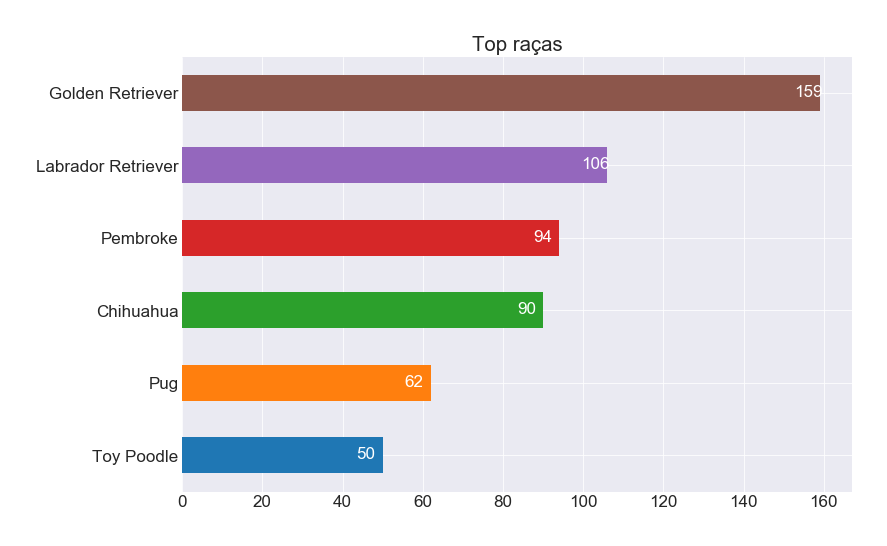

In [101]:
# Plotando top raças
for i, v in enumerate(df.dog_breed.value_counts().head(6).sort_values().tolist()):
    plt.text(v - 6.5, i - .05, str(v), color='white')
df.dog_breed.value_counts().head(6).sort_values().plot(kind='barh',title='Top raças')
plt.savefig('Graph01.png')

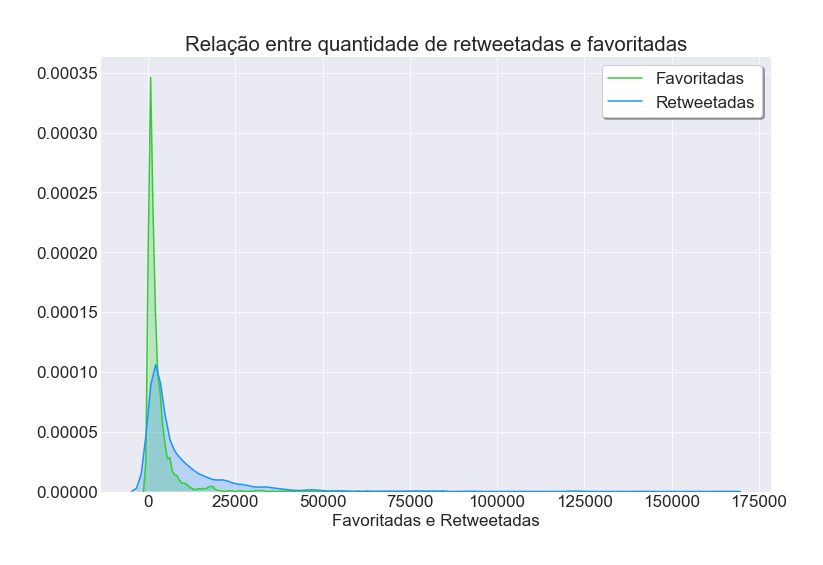

In [6]:
# Verificando e plotando concentração dos valores de retweetadas e favoritadas
sns.kdeplot(df.retweet_count, shade=True, color='limegreen')
sns.kdeplot(df.favorite_count, shade=True, color='dodgerblue')
plt.title('Relação entre quantidade de retweetadas e favoritadas')
plt.xlabel('Favoritadas e Retweetadas')
plt.ylabel('')
plt.legend(('Favoritadas','Retweetadas'), shadow=True, frameon=True, facecolor='white')
plt.savefig('Graph02.png')

In [23]:
print('Correlação entre o número de tweetadas e favoritadas é de %d%%' %int(df.favorite_count.corr(df.retweet_count)*100))

Correlação entre o número de tweetadas e favoritadas é de 92%


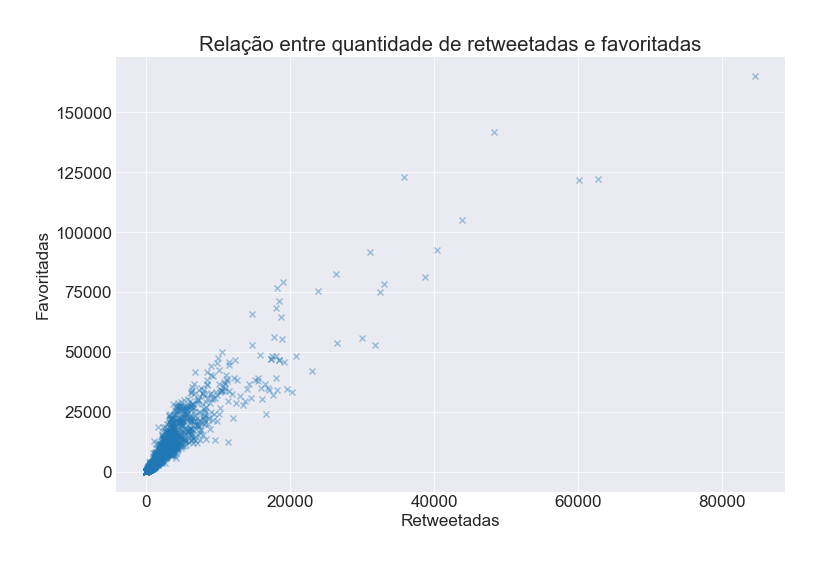

In [103]:
# Plotando distribuição dos valores de retweetadas X favoritadas
plt.subplots(figsize=(12,8))
sns.regplot(x=df.retweet_count, y=df.favorite_count, data=df, fit_reg=False, marker='x', scatter_kws={'alpha':0.4})
plt.title('Relação entre quantidade de retweetadas e favoritadas')
plt.xlabel('Retweetadas')
plt.ylabel('Favoritadas')
plt.savefig('Graph03.png')

In [104]:
print('Correlação entre a nota de avaliação e as tweetadas + favoritadas é de %d%%' %int(df.rating.corr(df.favorite_count + df.retweet_count)*100))

Correlação entre a nota de avaliação e as tweetadas + favoritadas é de 37%


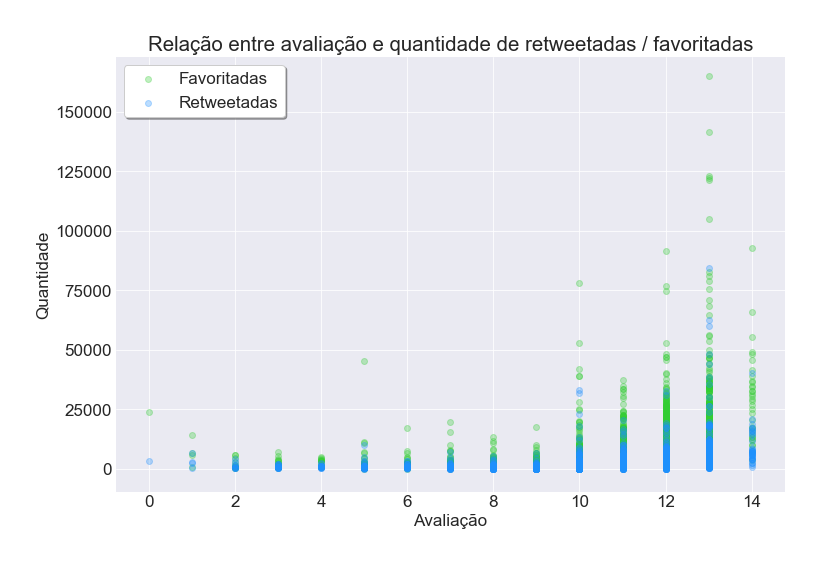

In [107]:
# Plotando relação das notas avaliadas com número de retweetadas e favoritadas
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(x=df.rating, y=df.favorite_count, data=df, marker='o', fit_reg=False, scatter_kws={'alpha':0.3}, color='limegreen')
sns.regplot(x=df.rating, y=df.retweet_count, data=df, marker='o', fit_reg=False, scatter_kws={'alpha':0.3}, color='dodgerblue')
plt.title('Relação entre avaliação e quantidade de retweetadas / favoritadas')
plt.xlabel('Avaliação')
plt.ylabel('Quantidade')
plt.legend(('Favoritadas','Retweetadas'), shadow=True, frameon=True, facecolor='white')
plt.savefig('Graph04.png')

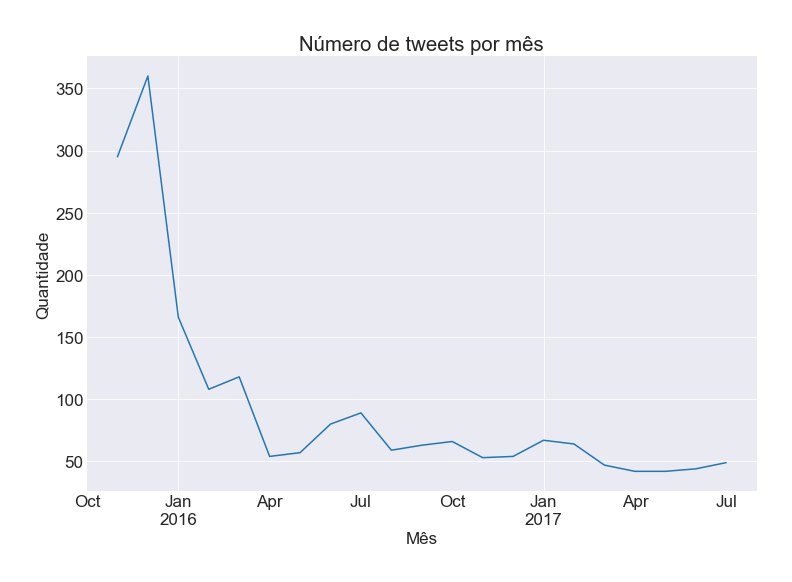

In [106]:
# Plotando número de postagens ao decorrer dos meses
temp = pd.DataFrame(df.timestamp.str[0:7].value_counts().reset_index())
temp.rename(columns={'index':'data','timestamp':'quantia'},inplace=True)
temp.data = pd.to_datetime(temp.data)
temp = temp.sort_values(by='data')
temp.drop(21, inplace=True)
temp.plot(x='data', y='quantia', title='Número de tweets por mês', legend=False)
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.savefig('Graph05.png')